In [35]:
function time_avg(S)
    DEPTH = size(S, 1)
    return sum(S[16*1div(DEPTH, 32)+1 : 1 : DEPTH, :], dims = 1) / (16*div(DEPTH, 32))
end

time_avg (generic function with 1 method)

In [37]:
using DelimitedFiles
using Printf

list_L = [100, 200, 500, 1000];
list_PANY = [0.04];
list_ETA  = [0.60, 1.00];
list_BETA = 0.00:0.20:1.40;

In [38]:
SA = Dict()
for L in list_L, p_ANY in list_PANY, η in list_ETA, β in list_BETA
    filename = string("./data_avg/", "SA_L_", lpad(L, 5, '0'), "_PANY_", @sprintf("%.3f", p_ANY), "_ETA_", @sprintf("%.3f", η), "_BETA_", @sprintf("%.3f", β), ".csv")
    if isfile(filename)
        SA[L, p_ANY, η, β] = readdlm(filename, ' ')
    end
end

In [39]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures 
pyplot()

theme(:default)

font_size = 18;

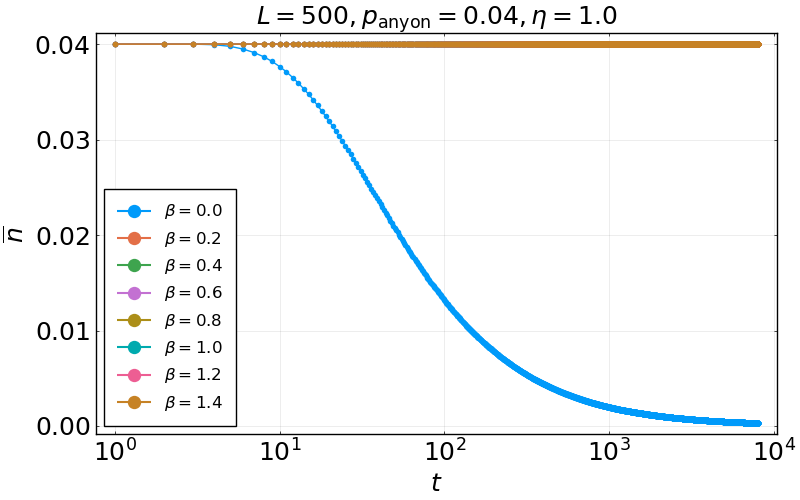

In [44]:
fig = plot()
    
p_any = 0.04
η = 1.0

L = 500

for β in list_BETA

    sa = SA[L, p_any, η, β] / (L*L)
    
    x_data = [t for t in 1:size(sa, 1)]
    y_data = sa[:, 1]
    
    # @show y_data[end]

    plot!(
        fig,
        x_data, y_data, 
        xlabel = L"t",
        # ylabel = string(L"S(A=[0, L/2])" ),
        ylabel = string(L"\overline{n}" ),
        m=(:c, 4, 1.0, stroke(1.0, 0, :dashdot)),
        # line = (2),
        xscale = :log10,
        # yscale = :log10,
        size = (800, 500),
        label=string(L"\beta = ", β),
        title = string(L"L = ", L, L", p_{\rm anyon} = ", p_any, L", \eta = ", η),
        xtickfont=font(font_size), 
        ytickfont=font(font_size), 
        guidefont=font(font_size), 
        legendfont=font(font_size-6),
        titlefont=font(font_size), 
        framestyle = :box,
        legend = :bottomleft
    )

end

x_data = 1:10:40000
# y_data = [√3/(2π)*log(x) + 0.6 for x in x_data]
# plot!(fig, x_data, y_data, label=string(L"\frac{\sqrt{3}}{2\pi} \ln L"))

# y_data = [√3/(2π)*log(x)*0.50 + 0.7 for x in x_data]
# plot!(fig, x_data, y_data, label=string(L"\overline{n} \cdot \frac{\sqrt{3}}{2\pi} \ln L"))

y_data = [0.4*x^(-0.5) for x in x_data]
# plot!(fig, x_data, y_data, line = (:blue, 2), label=string(L"t^{-1/2}"))

fig

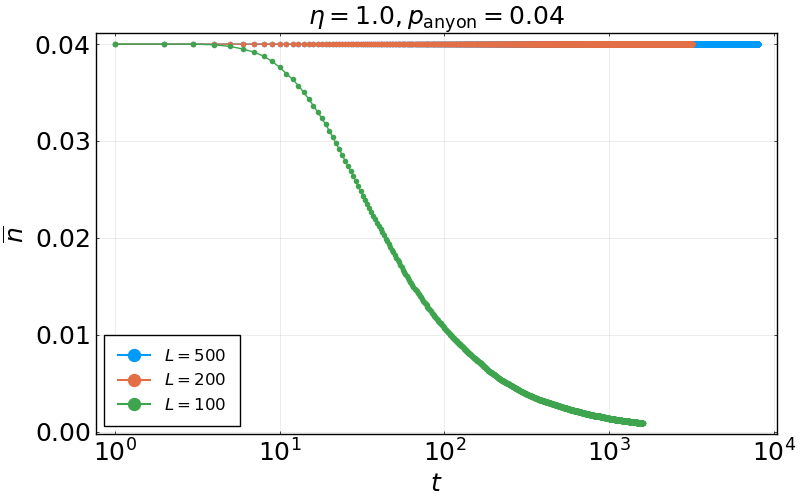

In [50]:
fig = plot()
    
p_any = 0.04
η = 1.00
β = 0.40

# L = 1000

for L in list_L[end-1:-1:1]

    sa = SA[L, p_any, η, β] / (L*L)
    
    x_data = [t for t in 1:size(sa, 1)]
    y_data = sa[:, 1]

    plot!(
        fig,
        x_data, y_data, 
        xlabel = L"t",
        # ylabel = string(L"S(A=[0, L/2])" ),
        ylabel = string(L"\overline{n}" ),
        m=(:c, 4, 1.0, stroke(1.0, 0, :dashdot)),
        # line = (2),
        xscale = :log10,
        # yscale = :log10,
        size = (800, 500),
        label=string(L"L = ", L),
        title = string(L"\eta = ", η, L", p_{\rm anyon} = ", p_any),
        xtickfont=font(font_size), 
        ytickfont=font(font_size), 
        guidefont=font(font_size), 
        legendfont=font(font_size-6),
        titlefont=font(font_size), 
        framestyle = :box,
        legend = :bottomleft
    )

end

x_data = 1:10:40000
# y_data = [√3/(2π)*log(x) + 0.6 for x in x_data]
# plot!(fig, x_data, y_data, label=string(L"\frac{\sqrt{3}}{2\pi} \ln L"))

# y_data = [√3/(2π)*log(x)*0.50 + 0.7 for x in x_data]
# plot!(fig, x_data, y_data, label=string(L"\overline{n} \cdot \frac{\sqrt{3}}{2\pi} \ln L"))

y_data = [0.4*x^(-0.5) for x in x_data]
# plot!(fig, x_data, y_data, line = (:blue, 2), label=string(L"t^{-1/2}"))

fig

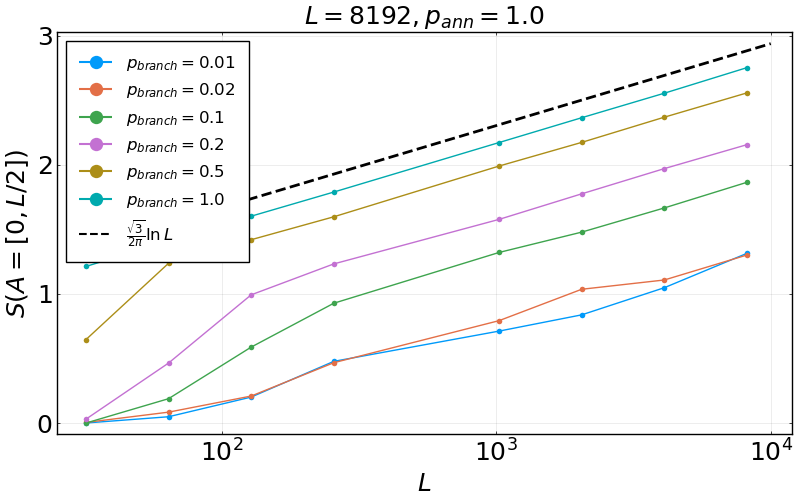

In [54]:
fig = plot()
    
p_ann = 1.0

# L = 2048

for p_branch in list_PBRANCH
    
    x_data = []
    y_data = []
    
    for L in list_L
        if haskey(SA, (L, p_ann, p_branch))
            sa = time_avg(SA[L, p_ann, p_branch])
            push!(x_data, L)
            # push!(y_data, sa[2] - log(2)*log(sa[1]))
            push!(y_data, sa[2])
        end
    end

    plot!(
        fig,
        x_data, y_data, 
        xlabel = L"L",
        ylabel = string(L"S(A=[0, L/2])" ),
        # ylabel = string(L"\overline{n}" ),
        m=(:c, 4, 1.0, stroke(1.0, 0, :dashdot)),
        # line = (2),
        xscale = :log10,
        # yscale = :log10,
        size = (800, 500),
        label=string(L"p_{branch} = ", p_branch),
        title = string(L"L = ", L, L", p_{ann} = ", p_ann),
        xtickfont=font(font_size), 
        ytickfont=font(font_size), 
        guidefont=font(font_size), 
        legendfont=font(font_size-6),
        titlefont=font(font_size), 
        framestyle = :box,
        legend = :topleft
    )

end

x_data = 30:10:10000
# y_data = [√3/(2π)*log(x) + 0.6 for x in x_data]
# plot!(fig, x_data, y_data, label=string(L"\frac{\sqrt{3}}{2\pi} \ln L"))

y_data = [√3/(2π)*log(x) + 0.4 for x in x_data]
plot!(fig, x_data, y_data, line = (:black, :dash, 2), label=string(L"\frac{\sqrt{3}}{2\pi} \ln L"))

y_data = [0.4*x^(-0.5) for x in x_data]
# plot!(fig, x_data, y_data, line = (:blue, 2), label=string(L"t^{-1/2}"))

fig

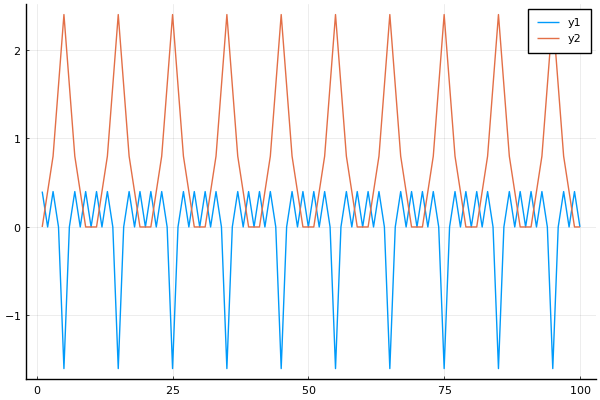

In [70]:
L = 100;

function next(i, L)
	return i%L + 1
end

function prev(i, L)
	return (i-1+L-1)%L + 1
end


x_data = 1:100;
y_data = [0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0, 0.0, 0.3999999999996362, 0.7999999999997272, 1.5999999999994543, 2.399999999999636, 1.5999999999994543, 0.7999999999997272, 0.3999999999996362, 0.0, 0.0]
z_data = [];
for i in x_data
    # if i == 1
    #     push!(z_data, y_data[i+1] - 2*y_data[i])
    # elseif i == length(x_data)
    #     push!(z_data, y_data[i-1] - 2*y_data[i])
    # else
    #     push!(z_data, y_data[i+1] + y_data[i-1] - 2*y_data[i])
    # end
    
    push!(z_data, y_data[next(i,L)] + y_data[prev(i,L)] - 2*y_data[i])
end
fig = plot()
plot!(fig, x_data, z_data)
plot!(fig, x_data, y_data)